##Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!rm -rf ~/.kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess -p /content/datasets/


 97% 414M/428M [00:02<00:00, 161MB/s]
100% 428M/428M [00:02<00:00, 160MB/s]


In [6]:
!unzip /content/datasets/toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

##Load The Data

In [7]:
paths = []
labels = []
for dirname, _, filename in os.walk("/content/TESS Toronto emotional speech set data"):
  for filename in filename:
    paths.append(os.path.join(dirname,filename))
    label = filename.split('_')[-1]
    label = label.split('.')[0]
    labels.append(label.lower())
print("Dataset is Loaded")

Dataset is Loaded


In [8]:
paths[:5]

['/content/TESS Toronto emotional speech set data/YAF_sad/YAF_rough_sad.wav',
 '/content/TESS Toronto emotional speech set data/YAF_sad/YAF_mess_sad.wav',
 '/content/TESS Toronto emotional speech set data/YAF_sad/YAF_deep_sad.wav',
 '/content/TESS Toronto emotional speech set data/YAF_sad/YAF_week_sad.wav',
 '/content/TESS Toronto emotional speech set data/YAF_sad/YAF_vine_sad.wav']

In [9]:
labels

['sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',


In [10]:
## Create a Dataframe
df = pd.DataFrame()
df['Speech'] = paths
df['label'] = labels
df.head()

,Speech,label
0,/content/TESS Toronto emotional speech set dat...,sad
1,/content/TESS Toronto emotional speech set dat...,sad
2,/content/TESS Toronto emotional speech set dat...,sad
3,/content/TESS Toronto emotional speech set dat...,sad
4,/content/TESS Toronto emotional speech set dat...,sad


In [11]:
df['label'].value_counts()

sad        400
fear       400
happy      400
disgust    400
neutral    400
ps         400
angry      400
Name: label, dtype: int64

## Exploratory Data Analysis

In [12]:
print(df['label'].unique())

['sad' 'fear' 'happy' 'disgust' 'neutral' 'ps' 'angry']


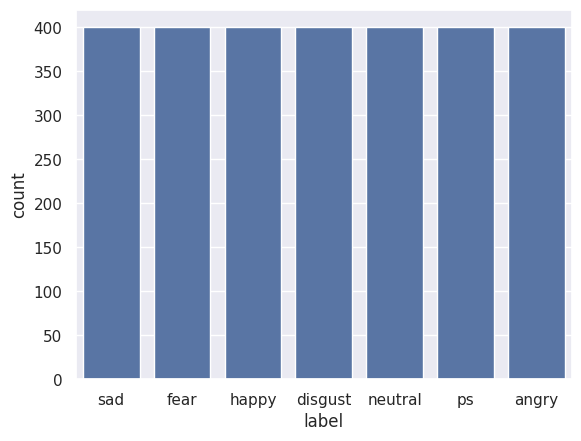

In [13]:
sns.set()  # Reset the default Seaborn settings and color palette
sns.countplot(data=df, x='label')
plt.show()

In [14]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

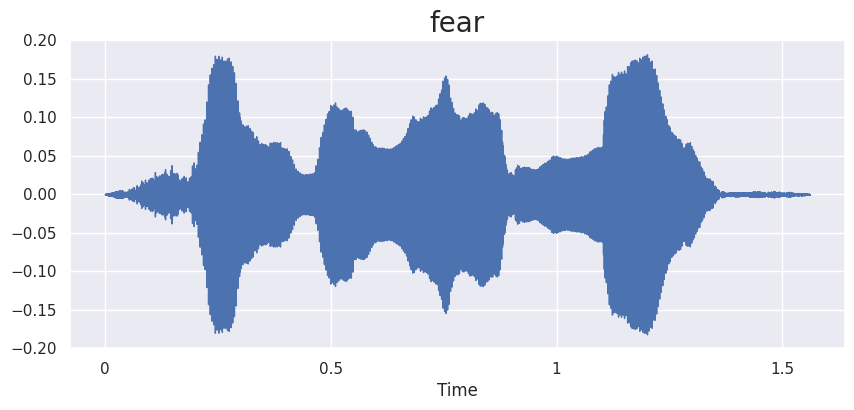

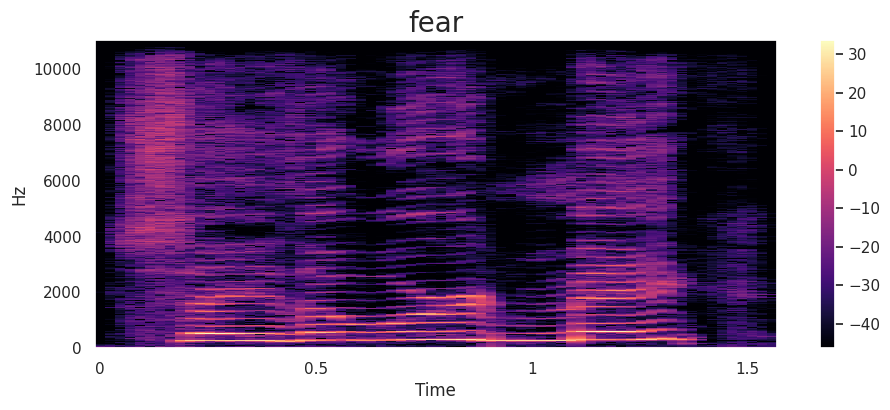

In [15]:
emotion = 'fear'
path = np.array(df['Speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

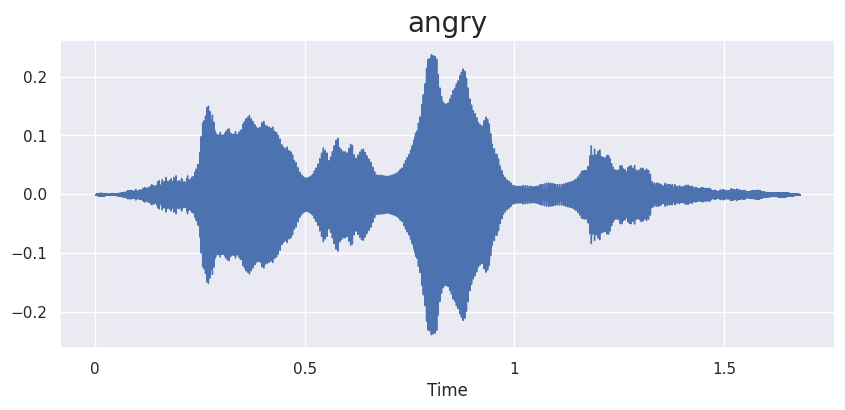

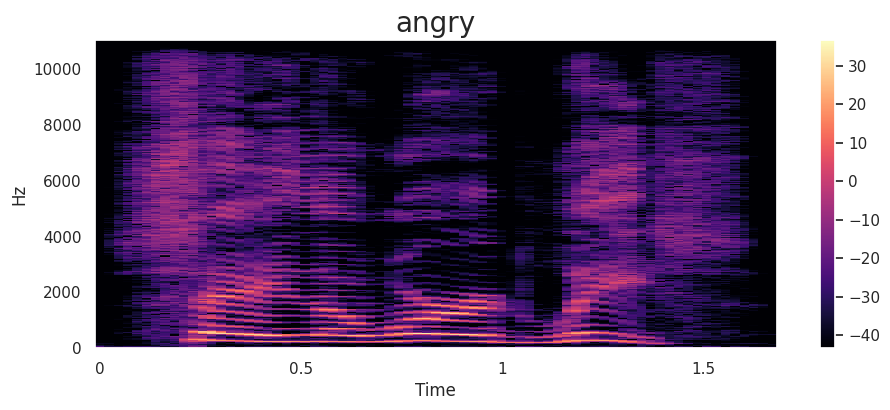

In [16]:
emotion = 'angry'
path = np.array(df['Speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

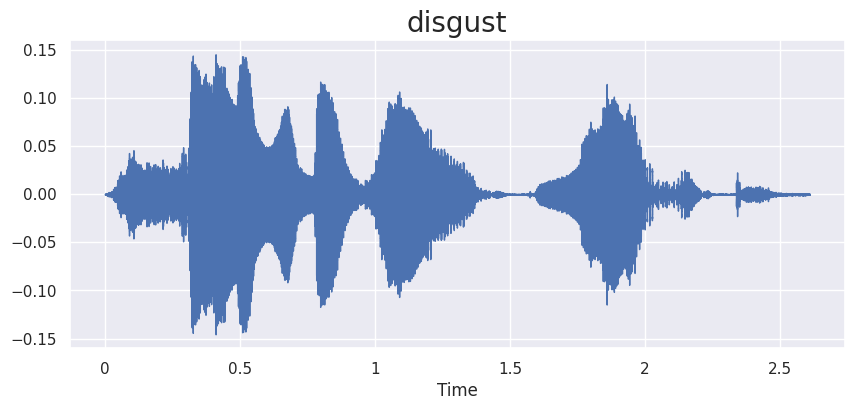

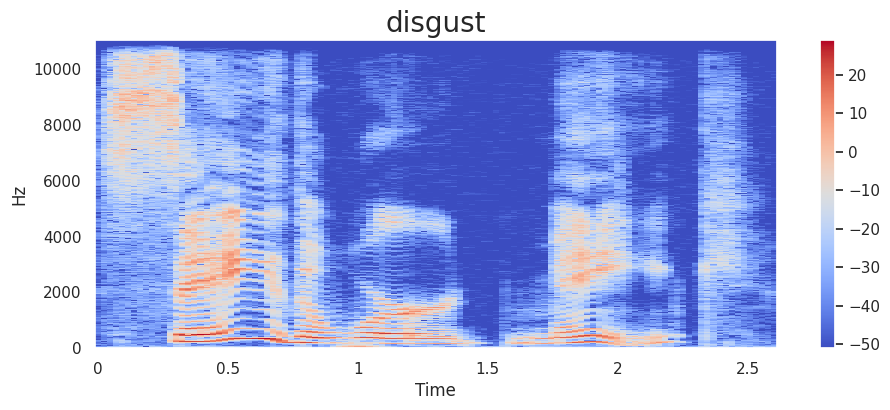

In [17]:
emotion = 'disgust'
path = np.array(df['Speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

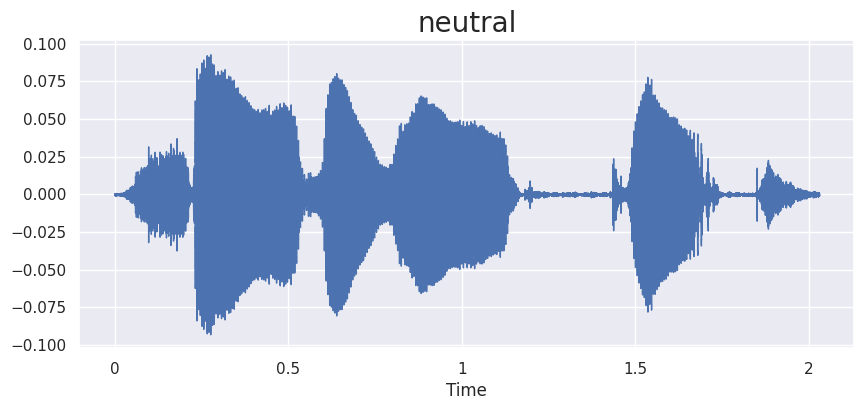

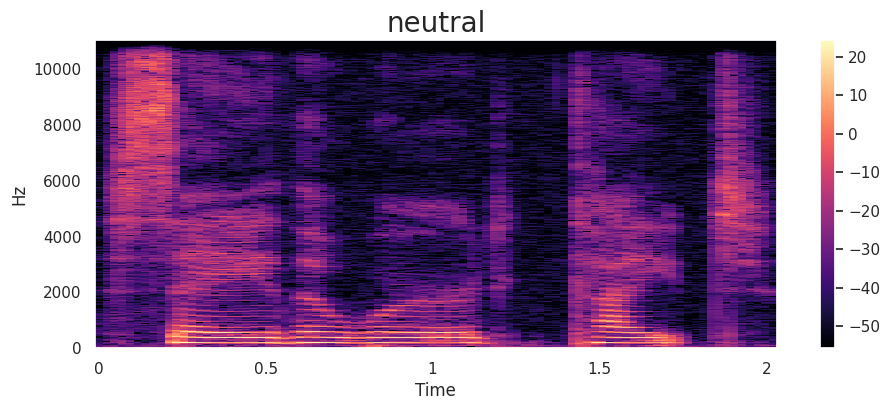

In [18]:
emotion = 'neutral'
path = np.array(df['Speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

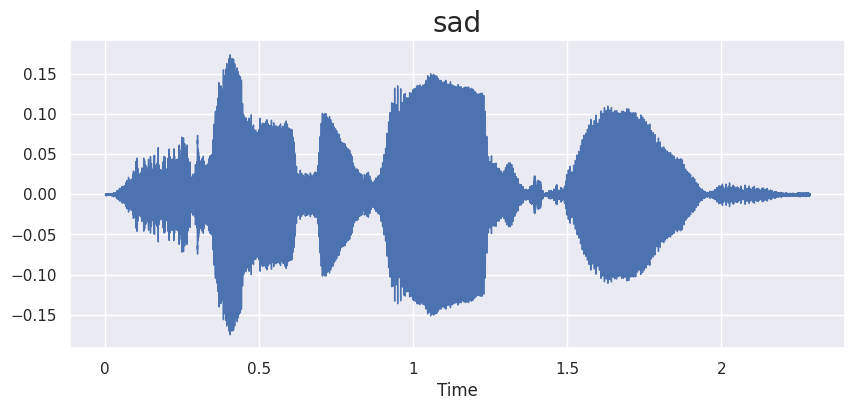

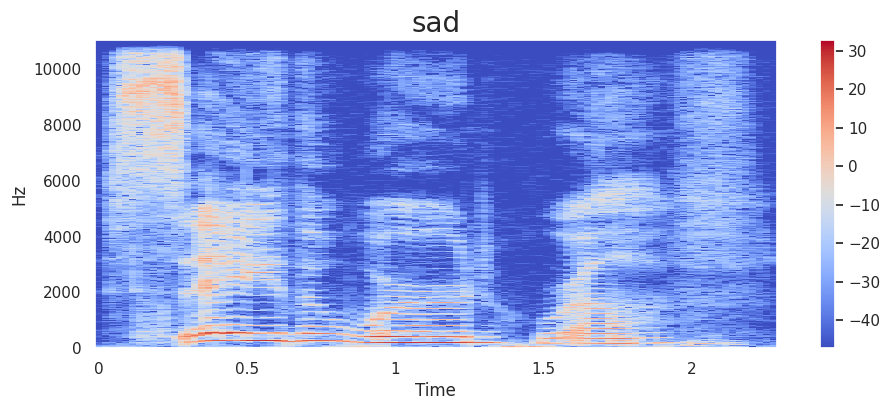

In [19]:
emotion = 'sad'
path = np.array(df['Speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

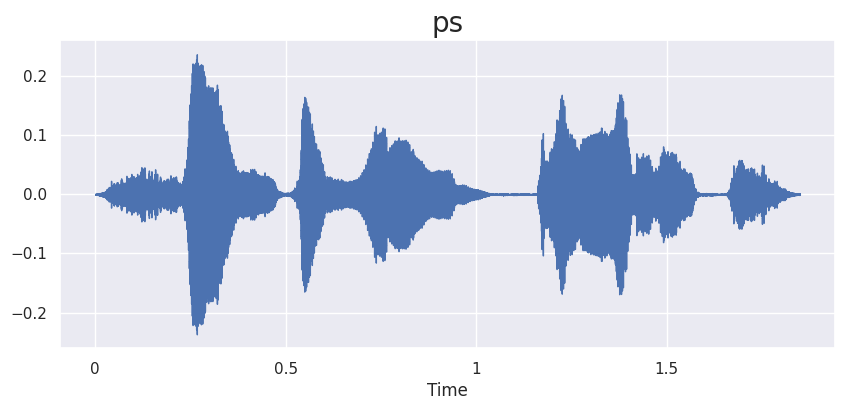

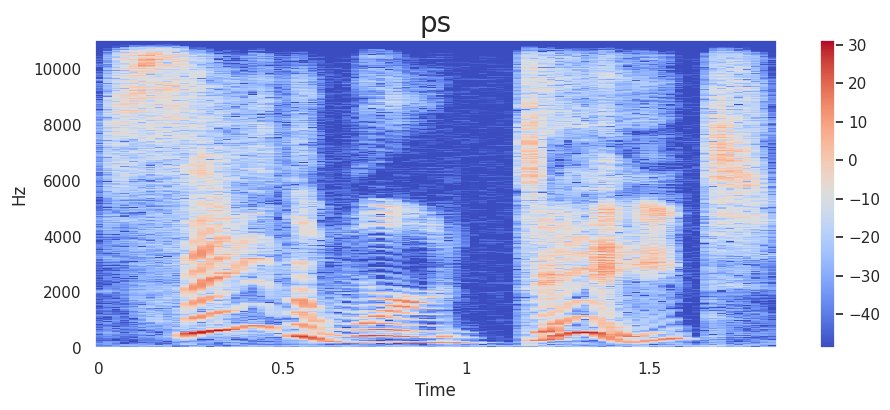

In [20]:
emotion = 'ps'
path = np.array(df['Speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [21]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [22]:
extract_mfcc(df['Speech'][0])

array([-4.1357156e+02,  9.0464500e+01,  1.7428688e+01,  2.7778210e+01,
        9.6528220e-01,  1.4008153e+01,  1.5913190e+00, -1.5988340e+01,
        2.1868763e+00, -5.6985798e+00, -6.3690357e+00,  6.3267708e-01,
       -8.0772171e+00,  8.5584145e+00, -9.2148924e+00, -1.1117187e+00,
       -3.1602933e+00, -5.5099802e+00, -4.3021183e+00, -3.8624775e+00,
       -5.5345893e+00, -8.1374521e+00, -9.2747650e+00,  3.7632558e+00,
       -4.5826898e+00,  7.0673232e+00,  3.7212334e+00,  2.6310734e-02,
       -1.0644275e+00, -1.8840512e+00, -4.9191437e+00,  8.6132555e+00,
        7.2040596e+00,  1.4627947e+01,  8.8423300e+00,  6.1231403e+00,
        3.3027296e+00,  4.9744673e+00,  4.1949148e+00,  6.5410810e+00],
      dtype=float32)

In [23]:
X_mfcc = df['Speech'].apply(lambda x: extract_mfcc(x))

In [24]:
X_mfcc

0       [-413.57156, 90.4645, 17.428688, 27.77821, 0.9...
1       [-422.06702, 67.7146, 32.768074, 23.11866, 6.9...
2       [-444.86426, 95.62697, 32.697212, 41.41305, 5....
3       [-409.97375, 99.349174, 28.270508, 43.880848, ...
4       [-391.7009, 105.86358, 24.74221, 39.54729, -5....
                              ...                        
2795    [-507.1967, 94.03554, 19.998798, -1.3087167, 1...
2796    [-509.63904, 119.73762, 14.648879, -17.266613,...
2797    [-511.89774, 93.7326, 21.949944, 0.27078596, 1...
2798    [-518.7857, 111.23247, 39.260277, 0.67468494, ...
2799    [-505.17703, 79.73936, 22.15061, 9.000075, 9.9...
Name: Speech, Length: 2800, dtype: object

In [25]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [26]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [27]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [28]:
y = y.toarray()

In [29]:

y.shape

(2800, 7)

##Create the LSTM Model

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [31]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)


Epoch 1/50
35/35 [==============================] - 6s 32ms/step - loss: 1.2495 - accuracy: 0.5063 - val_loss: 1.2072 - val_accuracy: 0.6571
Epoch 2/50
35/35 [==============================] - 1s 17ms/step - loss: 0.5514 - accuracy: 0.8018 - val_loss: 0.7374 - val_accuracy: 0.7429
Epoch 3/50
35/35 [==============================] - 2s 46ms/step - loss: 0.3392 - accuracy: 0.8938 - val_loss: 0.6181 - val_accuracy: 0.7768
Epoch 4/50
35/35 [==============================] - 1s 22ms/step - loss: 0.2208 - accuracy: 0.9290 - val_loss: 0.6211 - val_accuracy: 0.7929
Epoch 5/50
35/35 [==============================] - 1s 27ms/step - loss: 0.1654 - accuracy: 0.9504 - val_loss: 0.5190 - val_accuracy: 0.8339
Epoch 6/50
35/35 [==============================] - 1s 19ms/step - loss: 0.1464 - accuracy: 0.9549 - val_loss: 0.4301 - val_accuracy: 0.8696
Epoch 7/50
35/35 [==============================] - 1s 26ms/step - loss: 0.1400 - accuracy: 0.9563 - val_loss: 1.1979 - val_accuracy: 0.6875
Epoch 8/50
35

##Plot The Results

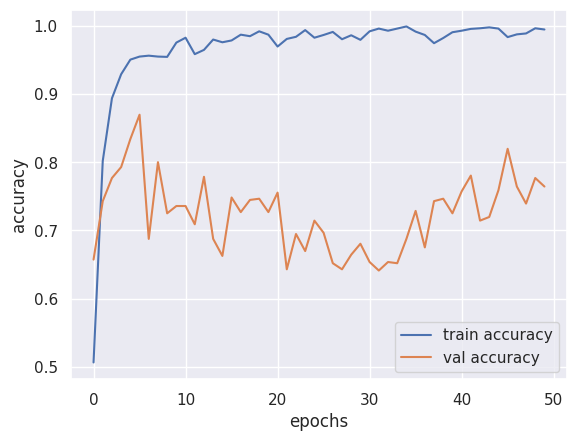

In [32]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

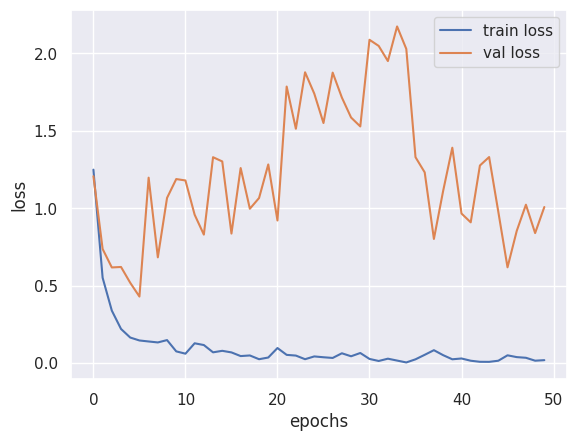

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [34]:
import pickle

In [36]:
pickle.dump(model,open('speechEmotionRecognition.pkl','wb'))

In [37]:
pickled_model=pickle.load(open('speechEmotionRecognition.pkl','rb'))

In [39]:
pickled_model.predict(X)

88/88 [==============================] - 0s 4ms/step


array([[3.0090077e-06, 5.5627617e-05, 1.6914452e-08, ..., 2.8931604e-08,
        1.1794591e-09, 9.9994123e-01],
       [3.6643503e-06, 4.3250515e-05, 2.0134360e-08, ..., 2.4522155e-08,
        1.2716025e-09, 9.9995279e-01],
       [4.1643645e-05, 1.2707738e-04, 2.1639286e-07, ..., 1.4769594e-07,
        6.1695697e-09, 9.9983037e-01],
       ...,
       [4.0413363e-07, 7.2514027e-05, 2.0555292e-06, ..., 9.9991715e-01,
        5.9393915e-06, 1.8932629e-06],
       [1.3295161e-06, 2.7963473e-04, 5.4830753e-06, ..., 9.9965811e-01,
        5.0463466e-05, 4.7876388e-06],
       [4.5523640e-05, 6.0541034e-03, 2.7508521e-04, ..., 9.8987728e-01,
        2.8920767e-04, 3.4202277e-03]], dtype=float32)

In [42]:
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])